In [64]:
import pandas as pd
from os import walk

In [65]:
datasets_names = []
path_df = '../datasets/original_files/'
for (dirpath, dirnames, filenames) in walk(path_df):
    datasets_names.extend(filenames)
    break
datasets_names

['boston-listings.csv.gz',
 'los_angeles-listings.csv.gz',
 'new_york_city-listings.csv.gz']

In [66]:
dataFrame = False
first = True
for name in datasets_names:
    if(first):
        first = False
        dataFrame = pd.read_csv(path_df+name, compression='gzip')
        dataFrame.set_index('id', drop=False, inplace=True)
        print('adding', len(dataFrame), 'rows')
    else:
        _tmpDf = pd.read_csv(path_df+name, compression='gzip')
        _tmpDf.set_index('id', drop=False, inplace=True)
        print('adding', len(_tmpDf), 'rows')
        dataFrame = pd.concat([dataFrame, _tmpDf])
        del _tmpDf
print('total rows:', len(dataFrame))
dataFrame.head()

adding 3799 rows


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


adding 38481 rows


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


adding 50796 rows
total rows: 93076


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
3781,3781,https://www.airbnb.com/rooms/3781,20200316134736,2020-03-16,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",...,f,f,super_strict_30,f,f,1,1,0,0,0.28
5506,5506,https://www.airbnb.com/rooms/5506,20200316134736,2020-03-16,**$79 Special ** Private! Minutes to center!,"Private guest room with private bath, You do n...",**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,"Private guest room with private bath, You do n...",none,"Peacful, Architecturally interesting, historic...",...,t,f,strict_14_with_grace_period,f,f,6,6,0,0,0.79
6695,6695,https://www.airbnb.com/rooms/6695,20200316134736,2020-03-16,$99 Special!! Home Away! Condo,"Comfortable, Fully Equipped private apartment...",** WELCOME *** FULL PRIVATE APARTMENT In a His...,"Comfortable, Fully Equipped private apartment...",none,"Peaceful, Architecturally interesting, histori...",...,t,f,strict_14_with_grace_period,f,f,6,6,0,0,0.89
8789,8789,https://www.airbnb.com/rooms/8789,20200316134736,2020-03-16,Curved Glass Studio/1bd facing Park,"Bright, 1 bed with curved glass windows facing...",Fully Furnished studio with enclosed bedroom. ...,"Bright, 1 bed with curved glass windows facing...",none,Beacon Hill is a historic neighborhood filled ...,...,f,f,strict_14_with_grace_period,f,f,7,7,0,0,0.35
10730,10730,https://www.airbnb.com/rooms/10730,20200316134736,2020-03-16,Bright 1bed facing Golden Dome,"Bright, spacious unit, new galley kitchen, new...",Bright one bed facing the golden dome of the S...,"Bright, spacious unit, new galley kitchen, new...",none,Beacon Hill is located downtown and is conveni...,...,f,f,strict_14_with_grace_period,f,f,7,7,0,0,0.24


In [67]:
#cleaning columns
for x in dataFrame.columns:
    print(x)
    values = dataFrame[x][pd.notna(dataFrame[x])].values
    if(len(values) > 0):
        print(values[0])
    else:
        print('NOT_VALUES')
    print('')

id
3781

listing_url
https://www.airbnb.com/rooms/3781

scrape_id
20200316134736

last_scraped
2020-03-16

name
HARBORSIDE-Walk to subway

summary
Fully separate apartment in a two apartment building. Space is perfect for an individual or a couple. There is a full bath, bedroom with queen bed, small sitting area with TV and a fully equipped kitchen with dining area. Walk or bus to subway.

space
This is a totally separate apartment located on the first floor of a 3 story building. Apartment has one bedroom with queen sized bed plus full eat-in kitchen,sitting room and full bath with tub/shower. Free off street parking for one car. SORRY NO SNOW REMOVAL SERVICE FOR CAR.  Free wi-fi  10 minute walk/5 minute bus (3 doors away) to subway station--next stop is Aquarium/Faneuil Hall in central Boston.  Guests who have stayed in our apartment have used it as a home base to explore Boston and surroundings. Others during extended stays at the apartment have commuted to  Massachusetts General Ho

In [68]:
# neighbourhood
# neighbourhood_cleansed
# neighbourhood_group_cleansed
# guests_included
# license
# is_business_travel_ready

cols_to_drop = [
    'market', 'street',
    'listing_url', 'scrape_id', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
    'host_name', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
    'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'zipcode', 'smart_location', 'country_code',
    'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people',
    'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
    'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
    'requires_license','jurisdiction_names','host_location'
]
# [colName for colName in dataFrame.columns if colName not in cols_to_drop]


# dataFrame.drop(cols_to_drop, axis=1, inplace=True)

In [69]:
# drop outliers
from scipy import stats
dataFrame.loc[:,  'price'] = dataFrame.price.apply(lambda x: x[1:-3].replace(',', '')).astype(int)
dataFrame = dataFrame[(np.abs(stats.zscore(dataFrame[['price']])) < 3)]

In [96]:
len(dataFrame)

92361

In [70]:
#text pipeline steps
from sklearn.base import BaseEstimator, TransformerMixin

#Esta clase simplemente filtra las columnas que se le indica en el constructor
class FeatureSelector( BaseEstimator, TransformerMixin ):
    #Class Constructor 
    def __init__( self, feature_names ):
        self._feature_names = feature_names 
    
    #Return self nothing else to do here    
    def fit( self, X, y = None ):
        return self 
    
    #Method that describes what we need this transformer to do
    def transform( self, X, y = None ):
        return X[ self._feature_names ]
    
class TextTransformer(BaseEstimator, TransformerMixin):
    
    def __clean_text(self, x):
        for punct in "/-'":
            x = x.replace(punct, ' ')
        for punct in '&':
            x = x.replace(punct, f' {punct} ')
        for punct in '?!.,"#$%\'()*+-/:;<=>@[\\]^_`{|}~•' + '“”’':
            x = x.replace(punct, '')
        return x.lower()
    
    def __parseTextCols(self, x):
        finalTexts = []
        for i in x:
            if(pd.notna(i) and i not in finalTexts):
                finalTexts.append(i)
        text = self.__clean_text(' '.join(finalTexts))
        return text
    
    def fit(self, X, y = None):
        return self
    
    def transform (self, X, y = None):
        return X.apply(self.__parseTextCols, axis=1)
    
    
from sklearn.feature_extraction.text import TfidfVectorizer
class custom_Tfidf(TfidfVectorizer, TransformerMixin):
    options= {
        'fitSample': 1
    }
    def __init__(self, params, options = None):
        self.vectorizer = TfidfVectorizer(**params)
        if(options != None):
            for key in options.keys():
                self.options[key] = options[key]
        
    def fit(self, X, y = None):
        self.vectorizer.fit(X.sample(frac=self.options['fitSample']))
        return self
    
    def transform(self, X, y = None):
        return self.vectorizer.transform(X)

In [71]:
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

text_cols = ["name","summary","space","description","neighborhood_overview","notes","transit","access",
             "interaction","house_rules","host_about"]

from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')
textVectSettings = {
    'stop_words': stopwords_en,
    'max_df': 0.90,
    'min_df': .05,
#     'ngram_range': (1),
    'max_features': 100
}

#Pasos para el pipeline Textos
text_pipeline = Pipeline(steps = [
    ( 'text_selector', FeatureSelector(text_cols) ),
    ( 'text_transformer', TextTransformer() ),
    ( 'text_vectorize',  custom_Tfidf(textVectSettings, {'fitSample':1}))
] )

In [72]:
dummy_cols = ["instant_bookable","is_business_travel_ready","cancellation_policy",
"require_guest_phone_verification",
"require_guest_profile_picture","host_response_time",
"host_is_superhost","host_has_profile_pic","host_identity_verified",
"city","state","property_type","room_type","bed_type"];

from sklearn.impute import SimpleImputer

dummy_pipeline = Pipeline(steps = [
    ('dummy_selector', FeatureSelector(dummy_cols)),
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [73]:

import numpy as np

class NumericalImputer(BaseEstimator, TransformerMixin):
    def __init__( self, default_strategy = "median"):
        self._default_strategy = default_strategy
        self._default_values = {}
        
    def fit( self, X, y = None ):
        X.host_response_rate = X.host_response_rate.str.replace('%', '').astype(float)
        X.host_acceptance_rate = X.host_acceptance_rate.str.replace('%', '').astype(float)
        
        X = X.replace( [ np.inf, -np.inf ], np.nan )
        
        for col in X.columns:
            if col=='number_of_reviews_ltm':
                default_value=0;
            elif col=='number_of_reviews':
                default_value=0;
            elif col=='host_listings_count':
                default_value=1;
            elif self._default_strategy=='median':
                default_value=np.median(X[col].dropna())
            elif self._default_strategy=='mode':
                default_value=np.mode(X[col].dropna())
            elif self._default_strategy=='mean':
                default_value=np.mean(X[col].dropna())
            else:
                default_value=np.median(X[col].dropna())
            self._default_values[col]=default_value

        return self 
    
    def transform(self, X, y = None):
        X.host_response_rate = X.host_response_rate.astype(str).str.replace('%', '').astype(float)
        X.host_acceptance_rate = X.host_acceptance_rate.astype(str).str.replace('%', '').astype(float)
        
        for col in X.columns:
            values = X.loc[:,col]
            values = values.replace( [ np.inf, -np.inf ], np.nan)
            values = values.fillna(self._default_values[col])
            X.loc[:, col] = values
        return X

class NumericalTransformer(BaseEstimator, TransformerMixin):
    def __init__( self, log_transform = True, bath_per_bed = True, bath_per_bedroom = True ):
        self._bath_per_bed = bath_per_bed
        self._bath_per_bedroom = bath_per_bedroom
        self._log_transform = log_transform
        
    def fit( self, X, y = None ):
        return self 
    
    def transform(self, X, y = None):
#         if self._bath_per_bedroom:
#             print(X['bathrooms'] / X['bedrooms'])
#             X.loc[:,'bath_per_bedroom'] = X['bathrooms'] / X['bedrooms']
#         if self._bath_per_bed:
#             X.loc[:,'bath_per_bed'] = X['bathrooms'] / X['beds']
#         if self._log_transform:
#             for col in X.columns:
#                 print(X[col].values)
#                 X.loc[:, 'log_'+col] = np.log(X[col])
        return X

In [74]:
continuos_cols = [
    "reviews_per_month","host_response_rate","host_acceptance_rate",
    "review_scores_communication","review_scores_location","review_scores_value",
    "number_of_reviews_ltm","review_scores_rating","review_scores_cleanliness",
    "review_scores_checkin","availability_30","availability_60","availability_90","availability_365",
    "review_scores_accuracy","minimum_nights","maximum_nights",
    "calculated_host_listings_count","calculated_host_listings_count_entire_homes",
    "calculated_host_listings_count_private_rooms","calculated_host_listings_count_shared_rooms",
    "host_listings_count","number_of_reviews",
    "accommodates","bathrooms","bedrooms","beds","guests_included",
]


numerical_pipeline = Pipeline( steps = [
    ( 'num_selector', FeatureSelector(continuos_cols) ),
    ( 'num_imputer', NumericalImputer(default_strategy = 'median') ),
    ( 'num_transformer', NumericalTransformer() ),
    ( 'std_scaler', StandardScaler() ) 
])

In [75]:


full_pipeline = FeatureUnion( transformer_list = [ 
    ('numerical_pipeline', numerical_pipeline ),
    ('dummy_pipeline', dummy_pipeline ),
    ('text_pipeline', text_pipeline ),
] )

In [76]:
from sklearn.model_selection import train_test_split

# y = dataFrame.price.apply(lambda x: x[1:-3].replace(',', '')).astype(int)
y = dataFrame.price
X = dataFrame.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.head()

# full_pipeline.fit(dataFrame)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
40943338,40943338,https://www.airbnb.com/rooms/40943338,20200313233908,2020-03-14,2 Story Luxury Fun House Apt in Heart of Holly...,Nearly 2K sq ft. This stunning TWO floor 2bd/ ...,You'll have access to a TV in every room. All ...,Nearly 2K sq ft. This stunning TWO floor 2bd/ ...,none,Trader Joes is right underneath you. The W Hot...,...,t,f,moderate,f,f,1,1,0,0,1.23
14109494,14109494,https://www.airbnb.com/rooms/14109494,20200313233810,2020-03-14,Clinton Hill Apartment Single Bedroom ! Pratt ~~,Single bedroom available in three bedroom apar...,Feel free to use all public spaces and rooftop...,Single bedroom available in three bedroom apar...,none,NaN,...,f,f,flexible,f,f,1,0,1,0,0.06
7789695,7789695,https://www.airbnb.com/rooms/7789695,20200313233908,2020-03-14,Blue Room / Redondo Beach House,Just several miles away from beautiful Manhatt...,The guest bedroom is located on the 2nd floor ...,Just several miles away from beautiful Manhatt...,none,"Manhattan Beach, Hermosa Beach and Redondo Bea...",...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,0.62
39859044,39859044,https://www.airbnb.com/rooms/39859044,20200313233810,2020-03-14,FULL HUGE APT in BUSHWICK,This gorgeous apartment in Bushwick -flexible ...,NaN,This gorgeous apartment in Bushwick -flexible ...,none,NaN,...,f,f,flexible,f,f,2,1,1,0,NaN
42679293,42679293,https://www.airbnb.com/rooms/42679293,20200313233810,2020-03-14,Great apt in the heart of East Williamsburg,This great studio one bedroom is located in th...,This apt have everything you need for a comfor...,This great studio one bedroom is located in th...,none,East Williamsburg is a great and safe neighbor...,...,f,f,strict_14_with_grace_period,f,f,3,3,0,0,NaN


In [77]:
full_pipeline.fit(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


FeatureUnion(n_jobs=None,
       transformer_list=[('numerical_pipeline', Pipeline(memory=None,
     steps=[('num_selector', FeatureSelector(feature_names=None)), ('num_imputer', NumericalImputer(default_strategy=None)), ('num_transformer', NumericalTransformer(bath_per_bed=None, bath_per_bedroom=None,
           log_transform=None...er', TextTransformer()), ('text_vectorize', custom_Tfidf(options={'fitSample': 1}, params=None))]))],
       transformer_weights=None)

In [78]:
train_data = full_pipeline.transform(X_train)
train_targets = y_train

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [82]:
train_data.shape

(61881, 845)

In [80]:
validation_data = full_pipeline.transform(X_test)
validation_targets = y_test

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [97]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.layers import Dropout
from keras import optimizers

model = Sequential()
model.add(Dense(1500, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_logarithmic_error', metrics=['mae', 'acc'])
# mean_squared_logarithmic_error
# mean_squared_error
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1500)              1269000   
_________________________________________________________________
dropout_11 (Dropout)         (None, 1500)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 1500)              2251500   
_________________________________________________________________
dropout_12 (Dropout)         (None, 1500)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 1500)              2251500   
_________________________________________________________________
dropout_13 (Dropout)         (None, 1500)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 1500)             

In [87]:
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=7, restore_best_weights=True, verbose=1)
callbacks_list = [early_stopping, reduce_lr]

history = model.fit(
    train_data,
    train_targets,
    epochs=100,
    batch_size=500,
    verbose=1,
    callbacks=callbacks_list,
    validation_split=.25
)

Train on 43316 samples, validate on 18565 samples
Epoch 1/100
43316/43316 [==============================] - 9s 211us/step - loss: 1.3089 - mae: 107.6035 - acc: 0.0059 - val_loss: 0.2434 - val_mae: 61.0868 - val_acc: 0.0096
Epoch 2/100
43316/43316 [==============================] - 12s 266us/step - loss: 0.2232 - mae: 58.9317 - acc: 0.0106 - val_loss: 0.1985 - val_mae: 55.8173 - val_acc: 0.0128
Epoch 3/100
43316/43316 [==============================] - 11s 265us/step - loss: 0.1981 - mae: 55.5479 - acc: 0.0121 - val_loss: 0.1842 - val_mae: 53.6574 - val_acc: 0.0124
Epoch 4/100
43316/43316 [==============================] - 12s 266us/step - loss: 0.1839 - mae: 53.4564 - acc: 0.0129 - val_loss: 0.1759 - val_mae: 52.1485 - val_acc: 0.0118
Epoch 5/100
43316/43316 [==============================] - 12s 277us/step - loss: 0.1771 - mae: 52.4446 - acc: 0.0109 - val_loss: 0.1707 - val_mae: 51.0439 - val_acc: 0.0113
Epoch 6/100
43316/43316 [==============================] - 14s 317us/step - loss

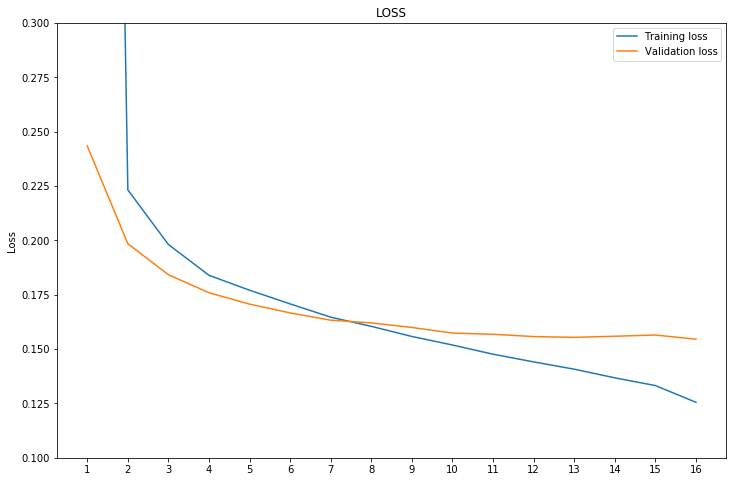

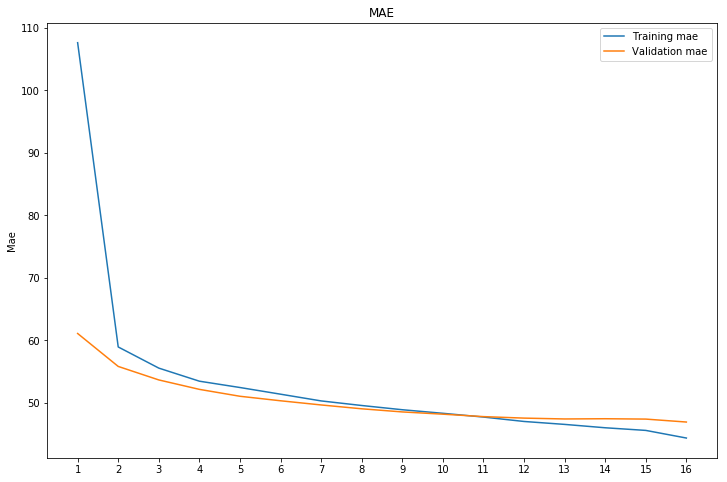

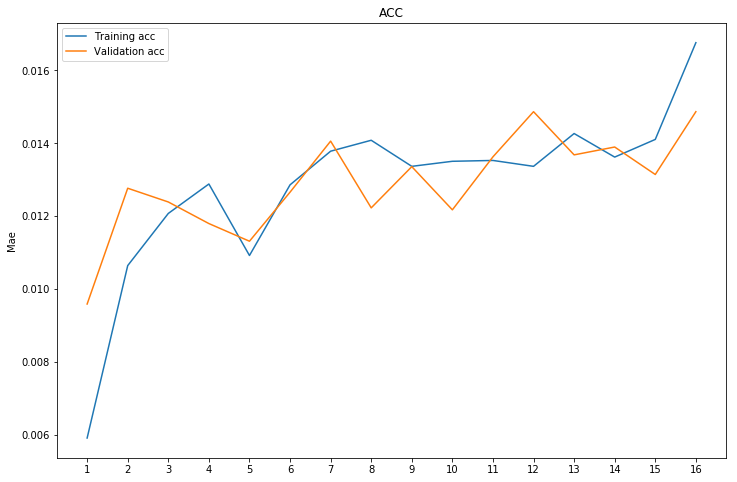

In [93]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.title('LOSS')
plt.plot(epochs, loss)
plt.ylim((.1, .3))
plt.plot(epochs, val_loss)
plt.xticks(ticks=epochs)
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'])
plt.show()

mae = history.history['mae']
val_mae = history.history['val_mae']
plt.figure(figsize=(12,8))
plt.title('MAE')
plt.plot(epochs, mae)
plt.plot(epochs, val_mae)
plt.xticks(ticks=epochs)
plt.ylabel('Mae')
plt.legend(['Training mae', 'Validation mae'])
plt.show()


acc = history.history['acc']
val_acc = history.history['val_acc']
plt.figure(figsize=(12,8))
plt.title('ACC')
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.xticks(ticks=epochs)
plt.ylabel('Mae')
plt.legend(['Training acc', 'Validation acc'])
plt.show()

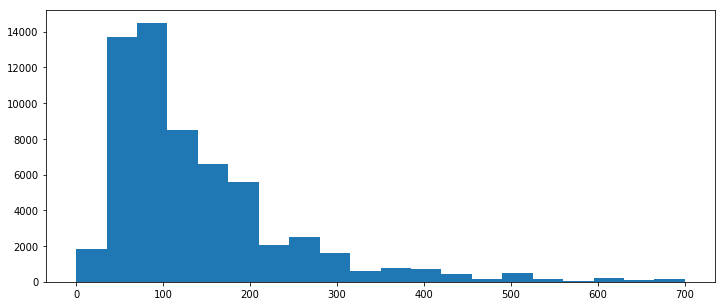

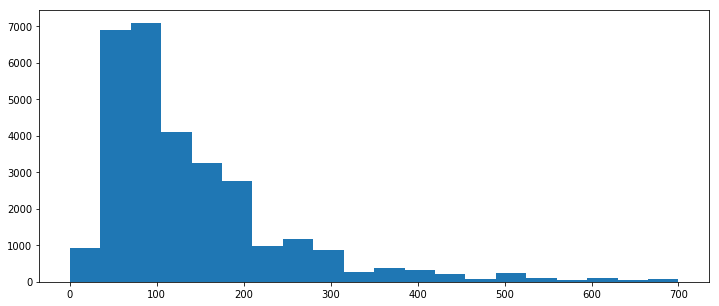

In [95]:
plt.figure(figsize=(12,5))
plt.hist(train_targets, bins=20, range=(0, 700))
plt.show()

plt.figure(figsize=(12,5))
plt.hist(validation_targets, bins=20, range=(0, 700))
plt.show()

In [94]:
history.history['mae'][-1]
# 66.35355
# 66.218636
# 59.322807
# 65.16372
# 68.29044

44.363464